## 创建验证码数据集

### 12306的原罪
* 一提起春运，大家就能想起12306和它的两大原罪。
* 一大原罪是票抢不上；另外一大，就是验证码恶心至极（见下图）。
* 12306为什么不选择对乘客更加友好的数字图片验证码呢？原因当然也很简单，就是对乘客友好的数字验证码，对于抢票软件来说更友好。而一般的乘客是抢不过签票软件的。
* 那么，这里就让我们来看看怎样用代码自动生成友好的数字验证码。

### 1、引入第三方包

In [1]:
from captcha.image import ImageCaptcha
import random 
import numpy as np 
import tensorflow.gfile as gfile 
import matplotlib.pyplot as mp
import PIL.Image as Image

### 2、定义常量和数据集

In [7]:
NUMBER = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

CAPTCHA_CHARSET = NUMBER     # 验证码字符集
CAPTCHA_LEN = 4              # 验证码长度
CAPTCHA_HEIGHT = 60          # 验证码高度
CAPTCHA_WIDTH = 160          # 验证码宽度

TRAIN_DATASET_SIZE = 3000    # 验证码训练集大小
TEST_DATASET_SIZE = 300     # 验证码测试集大小
TRAIN_DATA_DIR = './train_data/' # 训练集文件路径
TEST_DATA_DIR = './test_data/'   # 测试集文件路径

### 3、定义生成随机字符的方法

In [3]:
def gen_random_text(charset=CAPTCHA_CHARSET, length=CAPTCHA_LEN):
    text = [random.choice(charset) for _ in range(length)]
    return ''.join(text)

### 4、创建并保存验证码的方法

In [4]:
def create_captcha_dataset(size=100,data_dir='./data',
                          height=60,width=160,
                          image_format='.png'):
    # 如果文件夹已存在，则删除
    if gfile.Exists(data_dir):
        gfile.DeleteRecursively(data_dir)
    gfile.MakeDirs(data_dir)
    
    # 创建ImageCaptcha示例captcha
    captcha = ImageCaptcha(width=width, height=height)
    
    for _ in range(size):
        # 生成随机验证码字符
        text = gen_random_text(CAPTCHA_CHARSET,CAPTCHA_LEN)
        captcha.write(text, data_dir+text+image_format)

### 5、创建并保存训练集验证码

In [5]:
create_captcha_dataset(TRAIN_DATASET_SIZE,TRAIN_DATA_DIR)

### 6、创建并保存测试集验证码

In [8]:
create_captcha_dataset(TEST_DATASET_SIZE,TEST_DATA_DIR)

### 7、生成并返回验证码数据集的方法

In [9]:
def gen_captcha_dataset(size=100,height=60,
                       width=160,image_format='.png'):
    # 创建ImageCaptcha实例
    captcha = ImageCaptcha(width=width, height=height)
    # 初始化图像和文本数组
    images,texts = [None]*size,[None]*size
    for i in range(size):
        # 生成随机的验证码字符
        texts[i] = gen_random_text(CAPTCHA_CHARSET, CAPTCHA_LEN)
        # 利用PIL.Image将图像转化为(CAPTCHA_WIDTH, CAPTCHA_HEIGHT, 3)格式的numpy数组
        images[i] = np.array(Image.open(captcha.generate(texts[i])))
    return images,texts

### 8、生成100张验证码图像和字符

In [10]:
images,texts = gen_captcha_dataset()

In [14]:
print(len(images[8][0][0]))
print(texts[8])

3
8430


In [17]:
images[2]

array([[[247, 247, 254],
        [247, 247, 254],
        [247, 247, 254],
        ...,
        [247, 247, 254],
        [247, 247, 254],
        [247, 247, 254]],

       [[247, 247, 254],
        [247, 247, 254],
        [247, 247, 254],
        ...,
        [247, 247, 254],
        [247, 247, 254],
        [247, 247, 254]],

       [[247, 247, 254],
        [247, 247, 254],
        [247, 247, 254],
        ...,
        [247, 247, 254],
        [247, 247, 254],
        [247, 247, 254]],

       ...,

       [[247, 247, 254],
        [247, 247, 254],
        [247, 247, 254],
        ...,
        [247, 247, 254],
        [247, 247, 254],
        [247, 247, 254]],

       [[247, 247, 254],
        [247, 247, 254],
        [247, 247, 254],
        ...,
        [247, 247, 254],
        [247, 247, 254],
        [247, 247, 254]],

       [[247, 247, 254],
        [247, 247, 254],
        [247, 247, 254],
        ...,
        [247, 247, 254],
        [247, 247, 254],
        [247, 247, 254]]

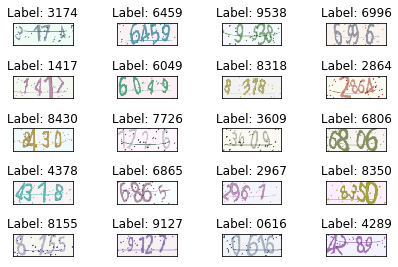

In [23]:
mp.figure()
# 绘制生成的前20个验证码图像
for i in range(20):
    mp.subplot(5,4,i+1)
    mp.tight_layout()
    mp.imshow(images[i])
    mp.title('Label: {}'.format(texts[i]))
    # 删除x,y坐标轴
    mp.xticks([])
    mp.yticks([])
mp.show()

### 9、可视化验证码图片

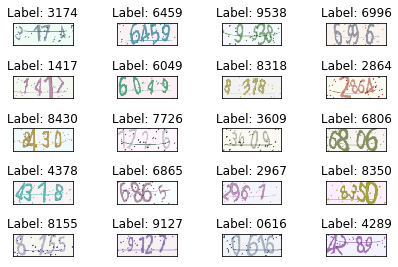

In [24]:
mp.figure()
# 绘制生成的前20个验证码图像
for i in range(20):
    mp.subplot(5,4,i+1)
    mp.tight_layout()
    mp.imshow(images[i])
    mp.title('Label: {}'.format(texts[i]))
    # 去除x,y坐标轴
    mp.xticks([])
    mp.yticks([])
mp.show()